<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/Monte_Carlo_de_Acierto_y_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Monte Carlo de Acierto y Error**
*Bazaldua Vera Tamara Alheli*

---

## **¿Qué hace?**
---

 Es una técnica probabilística para estimar el valor de una integral definida o el área bajo una curva usando puntos aleatorios.

---

##***Pasos a seguir***

---

1. Se dibuja un rectángulo que encierra la región bajo la curva $f(x)$.

2. Se generan puntos aleatorios $(x,y)$ dentro del rectángulo.

3. Se cuenta cuántos puntos caen debajo de la curva, es decir, si $ y \leq f(x)$.

4. La proporción de puntos que aciertan se multiplica por el área del rectángulo para estimar la integral.

---

## ***Fórmula***

---

Basicamente lo que se hace es:

$ \int_{a}^{b} f(x)dx = \frac{Ne}{Nt}  h  ( b - a ) $


donde:

*   Ne: Número de exitos (Puntos dentro de la región).
*   Nt: Número de puntos totales.
*   h: Altura
*   b - a: Base



---
###**Ventajas**

✔ No requiere conocer una fórmula cerrada de la integral.

✔ Funciona bien para funciones complicadas o multidimensionales.

✔ Muy útil cuando la dimensión del problema es alta.

---

###**Desventajas**

✘ Converge lentamente: necesitas muchos puntos para tener una estimación precisa.

✘ Menos eficiente que otros métodos como el Monte Carlo por promedio cuando $f(x)$ es evaluable directamente.

---

### **Código:**

Librerias a usar:

In [99]:
import random
from matplotlib import pyplot as plt
import numpy as np
import math
from statistics import stdev

Función a aproximar por el método

In [100]:
def f(x):
  return np.sqrt(np.arctan(x))

Variables globales

In [101]:
a=0
b=1
n = 10000

Funcion que genera puntos de manera aleatoria

In [102]:
def generar_puntos(n):
    dentro = []
    fuera = []
    contador = 0
    for _ in range(n):
        x = random.uniform(a,b)
        y = random.uniform(0,f(b))
        if  y <= f(x):
            dentro.append((x, y))
            contador += 1
        else:
            fuera.append((x, y))
    prob = (contador / n)  * (b - a) * f(b)

    return dentro, fuera,prob

Usamos la funcion y guardamos las variables

In [103]:
# Generar puntos
dentro, fuera, prob = generar_puntos(n)

Delimitamos el cuadrado

In [104]:
# Definimos el cuadrado
cuad_x = [a, b, b, a, a]
cuad_y = [0, 0, f(b), f(b), 0]

Graficamos la funcion f(X) dentro del cuadrado formado estimamos las áreas y el error


Puntos dentro de la función

El área es de:  0.6290438716863676

El área exacta es de:  0.62982

Error: 0.0007761283136324959


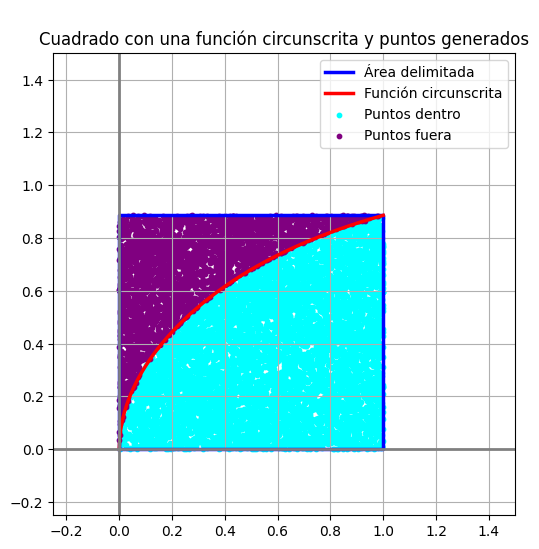

In [105]:
# Mostramos la probabilidad y el error del evento
print("\n\033[1mPuntos dentro de la función\033[0m")
print("\nEl área es de: ", prob)
print("\nEl área exacta es de: ", 0.62982)
print("\nError:", abs(0.62982 - prob))

# Crear un arreglo de valores de x entre 0 y 1
x = np.linspace(a, b, 400)

# Calcular y = sqrt(arctan(x)) para cada x
y = f(x)

# Creamos la gráfica
plt.figure(figsize=(6, 6))
plt.plot(cuad_x, cuad_y, label="Área delimitada", color='blue', linewidth=2.5)
plt.plot(x, f(x), label="Función circunscrita", color='red', linewidth=2.5)

# Graficamos los puntos
if dentro:
    x_dentro, y_dentro = zip(*dentro)
    plt.scatter(x_dentro, y_dentro, color='cyan', s=10, label="Puntos dentro")
if fuera:
    x_fuera, y_fuera = zip(*fuera)
    plt.scatter(x_fuera, y_fuera, color='purple', s=10, label="Puntos fuera")

# Configuramos límites y otras propiedades
plt.xlim(-0.25, 1.5)
plt.ylim(-0.25, 1.5)
plt.axhline(0, color='gray', linewidth=2)
plt.axvline(0, color='gray', linewidth=2)
plt.gca().set_aspect('equal', adjustable='box')

# Añadimos etiquetas y leyenda
plt.title("\nCuadrado con una función circunscrita y puntos generados")
plt.legend(loc="upper right")

# Mostramos la gráfica
plt.grid(True)
plt.show()

Función de ver la aleatoriedad del experimento, que tanto colapsa al resultado ideal

In [106]:
def experimento(m):
  p=[]
  for j in range(1,m):
    pi = generar_puntos(j)[2]
    p.append(pi)
  return  p

p= experimento(1000)

Graficamos la ocurrencia del experimento y los valores a los cuales debería converger

Media de las simulaciones: 0.629840838453511


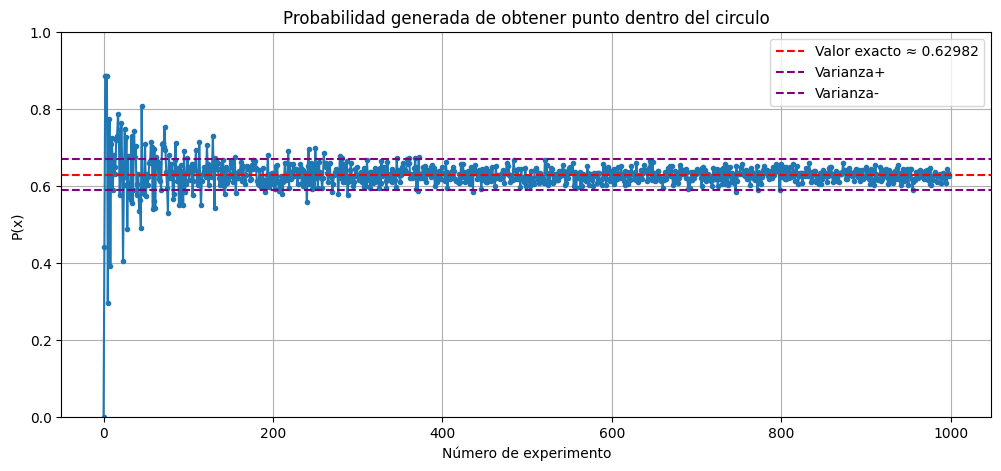

In [110]:
print("Media de las simulaciones:", np.mean(p))
# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(p, marker='o', markersize=3, linestyle='-')
plt.axhline(0.62982, color='r', linestyle='--', label="Valor exacto ≈ 0.62982")
plt.axhline(0.62982 + stdev(p), color='purple', linestyle='--', label="Varianza+")
plt.axhline(0.62982 - stdev(p), color='purple', linestyle='--', label="Varianza-")
plt.ylim(0, 1)
plt.title("Probabilidad generada de obtener punto dentro del circulo")
plt.xlabel("Número de experimento")
plt.ylabel("P(x)")
plt.legend()
plt.grid(True)
plt.show()